# Pipeline for Simulating GRNS on Sergio & Packing into Anndata object

First, create the files 

Import the necessary modules

In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
from pyslingshot import Slingshot #for simulating pseudotimes
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../SERGIO'))
from SERGIO.sergio import sergio

/Users/JenChen/Desktop/otvelo/researchy/lib/python3.9/site-packages/pyslingshot/slingshot.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


Simulate the GRN and save the splicing data to files

In [3]:
df = pd.read_csv('experiments_final/num_11/perturbed_matrix.tab', sep='\t', header=None, index_col=None)
bMat = df.values
print('here')
#rows and cols correspond to genes and cells (just verify)
# 100 x (6 x 300 )
#  100 genes, 6 cell types, 6 bins of 300 cells per cell type
# DO NOT include MR in the gene count
# make sure that all cells are tab separated and that zeros are just 0
# genes that are ONLY affector genes in the grn MUST be included as MR in the MR file
sim = sergio(number_genes=40, number_bins = 4, number_sc = 100, noise_params = 0.2, decays=0.8, sampling_state = 1, noise_params_splice = 0.07, noise_type='dpd', dynamics=True, bifurcation_matrix= bMat)
sim.build_graph(input_file_taregts ='experiments_final/num_11/gene_interactions.txt', input_file_regs='experiments_final/num_10/master_regulators.txt', shared_coop_state=2)
sim.simulate_dynamics()
# final ct matrix is the sum of U and S
#spliced matrix, unspliced, sum of both, pseudotime (probs just a vector bc each element in pseudotime is 1d scalar for 1 cell)
exprU, exprS = sim.getExpressions_dynamics()
exprU_clean = np.concatenate(exprU, axis = 1)
print(exprU_clean)
print(exprU_clean.shape)

exprS_clean = np.concatenate(exprS, axis = 1)
print(f"exprU_clean shape: {exprU_clean.shape}")
print(f"exprS_clean shape: {exprS_clean.shape}")

# Print the number of columns for each row
for i, row in enumerate(exprU_clean):
    print(f"Row {i} of exprU_clean has {len(row)} columns")

for i, row in enumerate(exprS_clean):
    print(f"Row {i} of exprS_clean has {len(row)} columns")

# Optionally save to text files
np.savetxt('exprU_clean.txt', exprU_clean, delimiter=' ', fmt='%f')
np.savetxt('exprS_clean.txt', exprS_clean, delimiter=' ', fmt='%f')


here
bindict
37
40
{0, 10} 35
[0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39]
Error: Inconsistent number of genes


SystemExit: 

/Users/JenChen/Desktop/otvelo/researchy/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
exprTotal_clean = exprU_clean + exprS_clean
print(f"exprTotal_clean shape: {exprTotal_clean.shape}")
np.savetxt('exprTotal_clean.txt', exprTotal_clean, delimiter=' ', fmt='%f')


exprTotal_clean shape: (15, 1200)


# Compute pseudotimes

First create the txt file from csv to find the pseudotimes

In [4]:
# import os

# def csv_to_txt(input_csv, output_folder="data/output"):
#     os.makedirs(output_folder, exist_ok=True)
#     output_txt = os.path.join(output_folder, os.path.basename(input_csv).replace(".csv", ".txt"))

#     with open(input_csv, 'r') as csv_file, open(output_txt, 'w') as txt_file:
#         for line in csv_file:
#             txt_file.write(line.replace(',', ' '))

#     print(f"Saved to {output_txt}")

# # Example usage in Jupyter Notebook
# input_csv = "--"  # Change this as needed
# csv_to_txt(input_csv)

#questions for wenjun: 
#what is the meaning of all of these instances of simulated csvs? are they all for the same grn and am i supposed to simulate all of them?
#for some reason when I transform the csv to txt, it's missing a single column header due to the nature of the data  
#help me figure out wt is going on w sergio


In [5]:
# data = np.loadtxt( "data_linear.txt" )

#data = np.load("data_bifurcate.npy")
def analyze_txt(input_txt):
    with open(input_txt, 'r') as txt_file:
        expected_columns = None
        for i, line in enumerate(txt_file):
            columns = line.strip().split()  # Split line into columns based on spaces
            num_columns = len(columns)
            
            if expected_columns is None:
                expected_columns = num_columns  # Set initial expected columns
            
            if num_columns != expected_columns:
                print(f"Column mismatch at row {i}: expected {expected_columns}, found {num_columns}")
            
            print(f"Row {i}: {num_columns} columns")  # Print column count for each row

# Example usage
input_txt = 'exprTotal_clean.txt'  # Replace with your actual TXT file path
analyze_txt(input_txt)

data = np.loadtxt( "exprTotal_clean.txt" )


Row 0: 1200 columns
Row 1: 1200 columns
Row 2: 1200 columns
Row 3: 1200 columns
Row 4: 1200 columns
Row 5: 1200 columns
Row 6: 1200 columns
Row 7: 1200 columns
Row 8: 1200 columns
Row 9: 1200 columns
Row 10: 1200 columns
Row 11: 1200 columns
Row 12: 1200 columns
Row 13: 1200 columns
Row 14: 1200 columns


In [6]:
data.shape

(15, 1200)

/var/folders/6s/mn0cx1qn7b901qdgrbh6z_hm0000gp/T/ipykernel_15516/2257869446.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


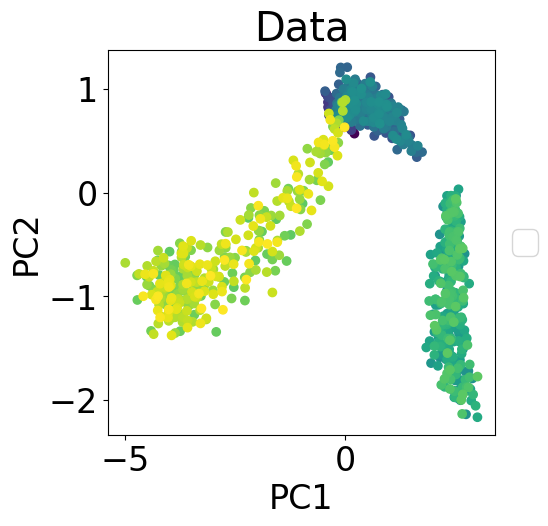

In [18]:
plt.rcParams["figure.figsize"] = (5,5)
        # PCAs:
from sklearn.decomposition import PCA
plt.rcParams["font.size"] = 24
pca = PCA(n_components=15)
Xt_all = pca.fit_transform(np.log2(data.T+1) ) 
plt.scatter(Xt_all[:,0],Xt_all[:,1], c=range(Xt_all.shape[0]) )
#         for j in range(Nt):
#             idx = range(num_cells_per_time*j, num_cells_per_time*(j+1))
#             plt.plot(Xt_all[idx,0],Xt_all[idx,1],'o-')
       
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
plt.show()

In [8]:
Xt_all.shape

(1200, 15)

In [9]:
# from sklearn.cluster import KMeans
from anndata import AnnData
# num_clusters = 9  # Set the number of clusters you want for KMeans

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(Xt_all)  # Using PCA components for clustering
cluster_labels = np.zeros( (1200) )
cluster_labels[0:300] = 0
cluster_labels[300:600] = 1
cluster_labels[600:900] = 2
cluster_labels[900:1200] = 3
# cluster_labels[400:500] = 4
cluster_labels=np.int8(cluster_labels)

In [10]:
cluster_labels[0]

0

Create anndata obj

In [11]:
num_cells = data.shape[1]
num_genes = data.shape[0]
ad = AnnData(data.T)
ad.obsm["X_umap"] = Xt_all[:,0:2]
ad.obs["celltype"] = cluster_labels

In [12]:
cluster_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int8)

/Users/JenChen/Desktop/otvelo/researchy/lib/python3.9/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[0, 1, 2], Lineage[0, 1, 3]]


  0%|          | 0/1 [00:00<?, ?it/s]/Users/JenChen/Desktop/otvelo/researchy/lib/python3.9/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @1 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7fceb9f255e0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7fceb9f2cf70>]
Shrinking branch @1 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7fceb9f255e0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7fceb9f2cf70>]


100%|██████████| 1/1 [00:04<00:00,  4.40s/it]


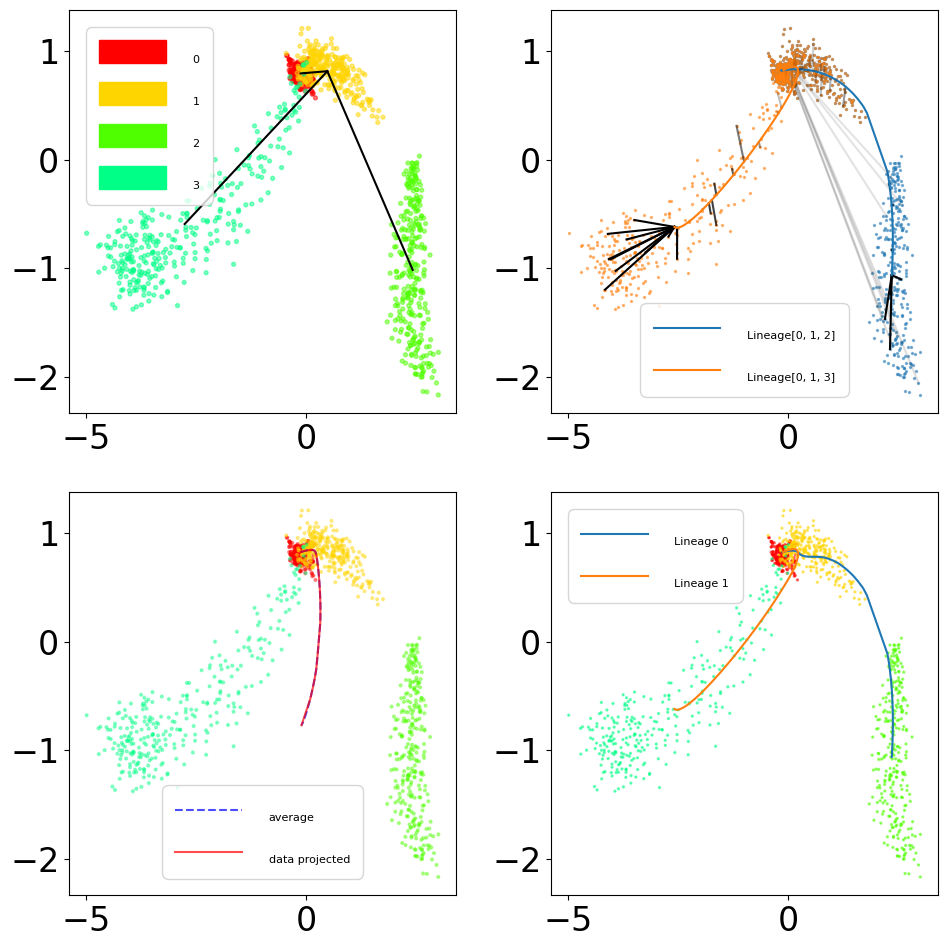

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)

slingshot = Slingshot(ad, celltype_key="celltype", obsm_key="X_umap", start_node=0, debug_level='verbose')


slingshot.fit(num_epochs=1, debug_axes=axes)

# Adjust legend size
for ax in axes.flatten():
    legend = ax.get_legend()
    if legend:
        legend.set_title(legend.get_title().get_text(), prop={'size': 10})  # Reduce legend title size
        for text in legend.get_texts():
            text.set_fontsize(8)  # Reduce legend item text size

plt.tight_layout()  # Optional: improves spacing
plt.savefig("experiments_final/num_10/slingshot_output.png", dpi=300)  # Saves the figure as a PNG with high resolution



In [14]:
pseudotime = slingshot.unified_pseudotime
ad.obs["pseudotime"] = slingshot.unified_pseudotime

print(type(slingshot.unified_pseudotime))  # Check the object type
print(slingshot.unified_pseudotime.shape)  # Check its dimensions
print(slingshot.unified_pseudotime[:5])    # Print first few values


<class 'numpy.ndarray'>
(1200,)
[2.20070909e-01 5.45368499e-01 4.44089210e-16 4.44089210e-16
 3.49658202e-02]


Add splicing data to anndata object also

In [15]:
spliced_data = np.loadtxt("exprS_clean.txt") #spliced RNA
unspliced_data = np.loadtxt("exprU_clean.txt") #unspliced RNA

# Ensure the shape matches adata.X (genes x cells)
print(spliced_data.shape)  # Should be (num_genes, num_cells)
print(unspliced_data.shape)  # Should be (num_genes, num_cells)
print(ad.layers.keys())
# Transpose if necessary (AnnData assumes cells x genes)
if spliced_data.shape[1] == ad.n_obs and spliced_data.shape[0] == ad.n_vars:
    ad.layers["spliced"] = spliced_data.T  # Ensure it aligns with AnnData structure
    print('done w spliced')
else:
    raise ValueError("Shape mismatch! Check if genes and cells are correctly aligned.")

if unspliced_data.shape[1] == ad.n_obs and unspliced_data.shape[0] == ad.n_vars:
    ad.layers["unspliced"] = unspliced_data.T  # Ensure it aligns with AnnData structure
    print('done w unspliced')
else:
    raise ValueError("Shape mismatch! Check if genes and cells are correctly aligned.")

# Print splicing data info
print("spliced data shape:", ad.layers["spliced"].shape)
print("spliced data (first 5 genes, first 5 cells):\n", ad.layers["spliced"][:5, :5])
print("unspliced data shape:", ad.layers["unspliced"].shape)
print("unspliced data (first 5 genes, first 5 cells):\n", ad.layers["unspliced"][:5, :5])

# Print pseudotime data info
print("Pseudotime data shape:", ad.obs["pseudotime"].shape)
print("Pseudotime values (first 10 cells):\n", ad.obs["pseudotime"].head(10))
print(ad.layers.keys())
ad.write("custom_ad.h5ad")


(15, 1200)
(15, 1200)
KeysView(Layers with keys: )
done w spliced
done w unspliced
spliced data shape: (1200, 15)
spliced data (first 5 genes, first 5 cells):
 [[15.082179  4.680274  3.715208 14.318797  6.101662]
 [13.309935  4.445336  3.67508  14.827438  5.21668 ]
 [13.687439  4.355182  3.432648 15.180164  5.559919]
 [13.525435  4.137252  3.668104 17.371475  6.247404]
 [13.7102    4.530322  3.747439 17.700895  5.929515]]
unspliced data shape: (1200, 15)
unspliced data (first 5 genes, first 5 cells):
 [[3.492052 1.366745 1.022093 3.275427 1.531818]
 [3.167279 1.182486 0.741657 3.492395 1.014037]
 [3.684549 1.077062 0.957865 3.939133 1.672183]
 [3.048572 0.783374 0.751113 4.242102 1.866321]
 [2.827306 1.02098  1.128036 4.554208 1.502232]]
Pseudotime data shape: (1200,)
Pseudotime values (first 10 cells):
 0    2.200709e-01
1    5.453685e-01
2    4.440892e-16
3    4.440892e-16
4    3.496582e-02
5    2.087828e-01
6    4.440892e-16
7    6.151447e-01
8    9.412142e-03
9    4.440892e-16
Name

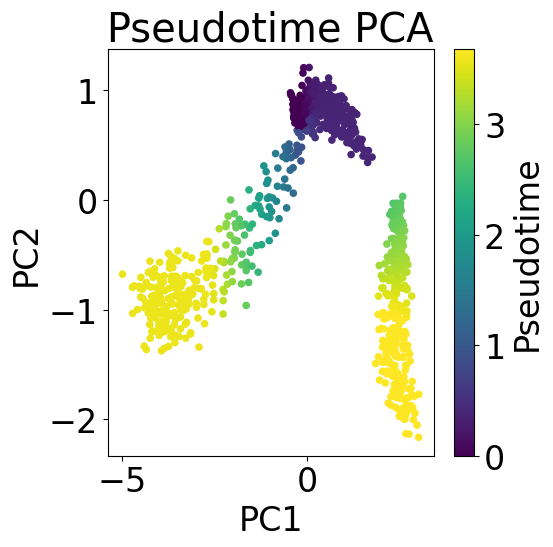

In [16]:
plt.rcParams["figure.figsize"] = (6,6)
        # PCAs:
from sklearn.decomposition import PCA
plt.rcParams["font.size"] = 24
pca = PCA()
Xt_all = pca.fit_transform(np.log2(data.T+1) ) 
# sc = plt.scatter(Xt_all[:,0],Xt_all[:,1], c=pseudotime )
sc = plt.scatter(Xt_all[:, 0], Xt_all[:, 1], c=pseudotime, cmap='viridis', s=20)

#         for j in range(Nt):
#             idx = range(num_cells_per_time*j, num_cells_per_time*(j+1))
#             plt.plot(Xt_all[idx,0],Xt_all[idx,1],'o-')
#how to keep track of which cell is corr to which branch

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pseudotime PCA')

# Add a colorbar to show pseudotime scale
cbar = plt.colorbar(sc)
cbar.set_label('Pseudotime')

plt.tight_layout()
plt.savefig("experiments_final/num_10/pseudotime_pca.png", dpi=300)  # Saves as a high-resolution PNG
plt.show()
